# Capstone Projecy: Prediction Delivery Time For Online Shopping

Huy Hoang Vuong | June 25, 2023

This Project is focused on predicting the estimated delivery time for the online shopping order, which helps to improve the customer experience by assisting them to answer the question: "When do I get my order ?" as close as possible.


***Please Note:*** This is Notebook 1 of 2 that was used to explore the data, find some missing or abnormal variables, and fill it up. There are also feature engineering steps to create a new feature and delete the duplicate element when the new feature is created.
The output of this step will be able to create a new CSV file which is clean (no missing or duplicate) and a new feature filled up.

In [80]:
#import all package need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import datetime as dt
import datetime 
import pytz
from dateutil import tz
from dateutil import parser

## EDA

Loading data

As the data is too big, we first working in the shortcut of the total data with 500000 rows.

In [81]:
df_ebay = pd.read_csv('../data/raw/ebayShort.csv', nrows=100000 ,index_col=0)

### Explore Data


In [82]:
# Look at the first 5 row
df_ebay.head(5)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


In [83]:
#Look at 5 random row
df_ebay.sample(5)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
34255,C2C,538035,1.0,2019-10-21 16:21:00.000-04:00,1,8.3,2,5,28210,30328,0,34.99,1,2019-10-19 23:55:59.000-04:00,2019-10-23,32,1,PACKAGE_THICK_ENVELOPE,34256
89007,B2C,77,1.0,2019-02-11 15:51:00.000-05:00,0,0.0,3,5,37932,95926,6,22.91,1,2019-02-10 02:38:22.000-05:00,2019-02-13,10,1,PACKAGE_THICK_ENVELOPE,89008
70375,C2C,109931,2.0,2019-09-16 14:15:00.000-04:00,0,0.0,3,5,44053,78253,3,14.39,1,2019-09-14 15:17:20.000-04:00,2019-09-18,16,1,PACKAGE_THICK_ENVELOPE,70376
5131,C2C,1031039,3.0,2018-05-21 10:06:00.000-04:00,1,0.0,2,5,24168,97267,9,25.00,2,2018-05-20 17:12:19.000-04:00,2018-05-23,168,1,PACKAGE_THICK_ENVELOPE,5132
85420,B2C,18345,2.0,2018-01-16 10:07:00.000-08:00,0,0.0,3,5,518000,78852,5,26.95,1,2018-01-13 21:00:15.000-08:00,2018-01-19,0,1,PACKAGE_THICK_ENVELOPE,85421


In [84]:
#check the shape of the dataset
print(f'There are {df_ebay.shape[0]} columns and {df_ebay.shape[1]} rows')

There are 100000 columns and 19 rows


In [85]:
# Get a quick overview of dataset variables
df_ebay.dtypes

b2c_c2c                       object
seller_id                      int64
declared_handling_days       float64
acceptance_scan_timestamp     object
shipment_method_id             int64
shipping_fee                 float64
carrier_min_estimate           int64
carrier_max_estimate           int64
item_zip                      object
buyer_zip                     object
category_id                    int64
item_price                   float64
quantity                       int64
payment_datetime              object
delivery_date                 object
weight                         int64
weight_units                   int64
package_size                  object
record_number                  int64
dtype: object

Show the columns which is not numeric

In [86]:
# 5 rows showing only 'object' columns
df_ebay.select_dtypes('object').head()

,b2c_c2c,acceptance_scan_timestamp,item_zip,buyer_zip,payment_datetime,delivery_date,package_size
0,B2C,2019-03-26 15:11:00.000-07:00,97219,49040,2019-03-24 03:56:49.000-07:00,2019-03-29,LETTER
1,C2C,2018-06-02 12:53:00.000-07:00,11415-3528,62521,2018-06-01 13:43:54.000-07:00,2018-06-05,PACKAGE_THICK_ENVELOPE
2,B2C,2019-01-07 16:22:00.000-05:00,27292,53010,2019-01-06 00:02:00.000-05:00,2019-01-10,PACKAGE_THICK_ENVELOPE
3,B2C,2018-12-17 16:56:00.000-08:00,90703,80022,2018-12-16 10:28:28.000-08:00,2018-12-21,PACKAGE_THICK_ENVELOPE
4,B2C,2018-07-27 16:48:00.000-07:00,90703,55070,2018-07-26 18:20:02.000-07:00,2018-07-30,PACKAGE_THICK_ENVELOPE


### Data cleanding

First let do some common checking in the dataset.
 -  Null value
 -  Duplicate row

#### Check null and duplicate

In [87]:
# checking duplicate rows
df_ebay.duplicated().any()

False

There are no duplicate row in the database

In [88]:
#Checking null
df_ebay.isna().sum()

b2c_c2c                         0
seller_id                       0
declared_handling_days       4958
acceptance_scan_timestamp       0
shipment_method_id              0
shipping_fee                    0
carrier_min_estimate            0
carrier_max_estimate            0
item_zip                        0
buyer_zip                       0
category_id                     0
item_price                      0
quantity                        0
payment_datetime                0
delivery_date                   0
weight                          0
weight_units                    0
package_size                    0
record_number                   0
dtype: int64

There are missing values in the `declared_handling_day` column

In [89]:
df_null=df_ebay[df_ebay.isna().any(axis=1)]
df_null.head()


,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
111,B2C,1369,NaN,2018-01-19 12:20:00.000-05:00,0,0.00,3,5,32703,32042,5,5.80,1,2018-01-18 20:50:28.000-05:00,2018-01-26,3,1,PACKAGE_THICK_ENVELOPE,112
190,B2C,15812,NaN,2018-10-31 15:00:00.000-07:00,0,1.95,3,5,49938-2038,55418,12,2.95,1,2018-10-31 09:38:02.000-07:00,2018-11-02,2,1,PACKAGE_THICK_ENVELOPE,191
243,B2C,19122,NaN,2018-11-27 21:34:00.000-08:00,0,0.00,3,5,90014,72202,8,14.00,1,2018-11-23 13:32:25.000-08:00,2018-11-30,3,1,PACKAGE_THICK_ENVELOPE,244
300,C2C,982206,NaN,2018-11-20 22:14:00.000-05:00,0,3.25,3,5,19114,01001,0,8.00,1,2018-11-17 15:46:03.000-05:00,2018-11-23,0,1,PACKAGE_THICK_ENVELOPE,301
348,B2C,15830,NaN,2018-01-19 23:11:31.000-08:00,0,0.00,3,5,19124-2342,33050,5,5.32,1,2018-01-18 15:37:56.000-08:00,2018-01-23,0,1,NONE,349


We are going to fill the NaN value for `declared_handling_days` column by find the average of `declared_handling_days` from the same seller_id

In [90]:
#get all the data without nan value
df_no_nan= df_ebay[df_ebay.notna().all(axis=1)]
df_no_nan.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


In [91]:
#Mean of not nan
handling_mean= df_no_nan['declared_handling_days'].mean()
handling_mean

1.6365606784369016

In [92]:
#Get the average for each seller_id
handling_day_mean_by_id=df_no_nan.groupby('seller_id').agg({'declared_handling_days':'mean'})

In [93]:
handling_days= df_ebay['declared_handling_days']
seller_id= df_ebay['seller_id']

In [94]:
handling_days_list=[]
# find the NaN value in declared_hadling_day and fill value with the mean of the handling days from same seller
for index, day in enumerate(handling_days):
    if np.isnan(day):
        seller= seller_id[index]
        if seller in handling_day_mean_by_id.index:
            handling_days_list.append(round(handling_day_mean_by_id[handling_day_mean_by_id.index==seller].values[0][0]))
        # if the seller is not in the seller list, fill with mean of handling days
        else:
            handling_days_list.append(round(handling_mean))
    else:
        handling_days_list.append(day)
df_ebay['declared_handling_days']= handling_days_list

In [95]:
#check is there any missing
df_ebay['declared_handling_days'].value_counts()

1.0     51941
2.0     21336
3.0     16782
0.0      7018
5.0      1485
4.0       781
10.0      415
15.0      100
30.0       68
20.0       64
8.0         4
6.0         3
9.0         1
16.0        1
14.0        1
Name: declared_handling_days, dtype: int64

#### Checking is there any unsusal value in columns.

In [96]:
#check is there any row in carrier_max_estimate and carrier_min_estimate have the unsual value
df_ebay[(df_ebay['carrier_max_estimate']<=0 ) | (df_ebay['carrier_min_estimate']<=0)]

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
19357,C2C,708260,2.0,2018-09-19 11:16:00.000-04:00,12,65.00,-1,-1,45504,01412000,3,61.00,1,2018-09-17 22:31:41.000-04:00,2018-10-08,48,1,PACKAGE_THICK_ENVELOPE,19358
19975,B2C,908,1.0,2019-01-04 12:13:00.000-05:00,12,12.00,-1,-1,03104,28232,2,22.44,1,2019-01-03 10:28:28.000-05:00,2019-01-31,0,1,LETTER,19976
27005,B2C,269,0.0,2018-08-20 13:48:00.000-07:00,12,1.70,-1,-1,93535-4990,L1T 3L7,4,2.20,1,2018-08-16 21:31:07.000-07:00,2018-08-29,2,1,PACKAGE_THICK_ENVELOPE,27006
34165,C2C,173517,2.0,2019-10-08 20:54:00.000-04:00,15,0.00,0,1,32064,12570,3,15.00,1,2019-10-07 02:34:18.000-04:00,2019-10-10,0,1,PACKAGE_THICK_ENVELOPE,34166
38042,B2C,102172,1.0,2018-01-29 14:25:00.000-06:00,12,0.95,-1,-1,53538,7570090,4,8.00,1,2018-01-28 13:21:39.000-06:00,2018-02-15,0,1,NONE,38043
42391,B2C,102172,1.0,2019-01-22 15:59:00.000-06:00,12,0.00,-1,-1,53538,7570090,4,10.55,1,2019-01-20 14:22:22.000-06:00,2019-01-30,0,1,NONE,42392
63216,B2C,1762594,2.0,2018-05-18 11:16:00.000-07:00,12,0.00,-1,-1,94124,80099,30,105.00,1,2018-05-16 12:55:36.000-07:00,2018-05-22,16,1,PACKAGE_THICK_ENVELOPE,63217
66574,B2C,40345,4.0,2018-11-27 18:38:00.000-05:00,12,10.00,-1,-1,48038,B3H 2T1,11,39.99,1,2018-11-27 08:51:13.000-05:00,2018-12-10,3,1,PACKAGE_THICK_ENVELOPE,66575
66892,C2C,225573,3.0,2019-01-11 18:45:00.000-06:00,15,0.00,0,1,55124,44647,9,28.96,3,2019-01-10 06:47:25.000-06:00,2019-01-14,0,1,NONE,66893
73682,B2C,8073,3.0,2018-06-07 08:22:00.000-07:00,15,0.00,0,1,89030,70769,5,11.99,1,2018-06-04 10:53:25.000-07:00,2018-06-09,0,1,NONE,73683


Seem like there are some rows with the value of `carrier_max_estimate` and `carrier_min_estimate` is -1. We are going to spend more investigate on it

In [97]:
df= df_ebay[(df_ebay['carrier_max_estimate']<0 ) | (df_ebay['carrier_min_estimate']<0)]
print(df.shape)
df

(10, 19)


,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
19357,C2C,708260,2.0,2018-09-19 11:16:00.000-04:00,12,65.00,-1,-1,45504,01412000,3,61.00,1,2018-09-17 22:31:41.000-04:00,2018-10-08,48,1,PACKAGE_THICK_ENVELOPE,19358
19975,B2C,908,1.0,2019-01-04 12:13:00.000-05:00,12,12.00,-1,-1,03104,28232,2,22.44,1,2019-01-03 10:28:28.000-05:00,2019-01-31,0,1,LETTER,19976
27005,B2C,269,0.0,2018-08-20 13:48:00.000-07:00,12,1.70,-1,-1,93535-4990,L1T 3L7,4,2.20,1,2018-08-16 21:31:07.000-07:00,2018-08-29,2,1,PACKAGE_THICK_ENVELOPE,27006
38042,B2C,102172,1.0,2018-01-29 14:25:00.000-06:00,12,0.95,-1,-1,53538,7570090,4,8.00,1,2018-01-28 13:21:39.000-06:00,2018-02-15,0,1,NONE,38043
42391,B2C,102172,1.0,2019-01-22 15:59:00.000-06:00,12,0.00,-1,-1,53538,7570090,4,10.55,1,2019-01-20 14:22:22.000-06:00,2019-01-30,0,1,NONE,42392
63216,B2C,1762594,2.0,2018-05-18 11:16:00.000-07:00,12,0.00,-1,-1,94124,80099,30,105.00,1,2018-05-16 12:55:36.000-07:00,2018-05-22,16,1,PACKAGE_THICK_ENVELOPE,63217
66574,B2C,40345,4.0,2018-11-27 18:38:00.000-05:00,12,10.00,-1,-1,48038,B3H 2T1,11,39.99,1,2018-11-27 08:51:13.000-05:00,2018-12-10,3,1,PACKAGE_THICK_ENVELOPE,66575
78072,B2C,66159,3.0,2018-09-13 11:25:00.000-06:00,12,23.50,-1,-1,79968,154-0012,6,116.50,1,2018-09-12 17:44:51.000-06:00,2018-09-21,16,1,PACKAGE_THICK_ENVELOPE,78073
78140,B2C,5197,1.0,2018-09-24 20:33:00.000-04:00,12,25.00,-1,-1,07307,8241587,18,9.99,1,2018-09-22 15:44:17.000-04:00,2018-10-20,0,1,PACKAGE_THICK_ENVELOPE,78141
98005,B2C,23064,1.0,2018-06-05 15:06:00.000-04:00,12,4.49,-1,-1,18045,K9J2P6,6,5.49,1,2018-06-04 08:30:13.000-04:00,2018-06-13,4,1,PACKAGE_THICK_ENVELOPE,98006


As we can see all the records have `carrier_max_estimate` and `carrier_min_estimate` = -1 is belong to the shipment method 12. Let check with the `shipment_method_id`=12 is there any other value for the `carrier_max_estimate` and `carrier_min_estimate`

In [98]:
df_ebay[df_ebay['shipment_method_id']==12][['carrier_max_estimate', 'carrier_min_estimate']].value_counts()

carrier_max_estimate  carrier_min_estimate
-1                    -1                      10
dtype: int64

So we can see that all the record with the `shipment_method_id`=12 will have the `carrier_max_estimate`and `carrier_min_estimate` =-1 and some values are 0. For the 0 values, we can understand that the order will be processed in the same day, so we only need to take care about the -1 value. The solution is we will replace those negative value by the mean value of `carrier_max_estimate` and `carrier_min_estimate` from the `seller_id` =12

In [99]:
# Max estimate mean
max_mean= df_ebay[df_ebay['shipment_method_id'] != 12]['carrier_max_estimate'].mean()

print(f'Mean value of carrier_max_estimate is : {max_mean}')

Mean value of carrier_max_estimate is : 5.483628362836283


Replace the `carrier_max_estimate` value in the row with `shipment_method_id`=12 by mean value of `carrier_max_estimate`

In [100]:
df_ebay['carrier_max_estimate']= np.where(df_ebay['shipment_method_id']==12, max_mean, df_ebay['carrier_max_estimate'])

In [101]:
#check
df_ebay[df_ebay['shipment_method_id']==12]['carrier_max_estimate']

19357    5.483628
19975    5.483628
27005    5.483628
38042    5.483628
42391    5.483628
63216    5.483628
66574    5.483628
78072    5.483628
78140    5.483628
98005    5.483628
Name: carrier_max_estimate, dtype: float64

In [102]:
#Min estimate mean
min_mean= df_ebay[df_ebay['shipment_method_id']!=12]['carrier_min_estimate'].mean()
print(f'Mean value of carrier_min_estimate is: {min_mean}')

Mean value of carrier_min_estimate is: 2.6153515351535153


Replace the `carrier_min_estimate` value in the row with `shipment_method_id`=12 by mean value of `carrier_min_estimate`

In [103]:
df_ebay['carrier_min_estimate']= np.where(df_ebay['shipment_method_id']==12, min_mean, df_ebay['carrier_min_estimate'])

In [104]:
#Check
df_ebay[df_ebay['shipment_method_id']==12]['carrier_min_estimate']

19357    2.615352
19975    2.615352
27005    2.615352
38042    2.615352
42391    2.615352
63216    2.615352
66574    2.615352
78072    2.615352
78140    2.615352
98005    2.615352
Name: carrier_min_estimate, dtype: float64

#### Convert the `acceptance_scan_timestamp` and `payment_datetime` 


Working with `acceptance_scan_timestamp` and `payment_datetime`. convert all in to buyer timezone

In [105]:
#Recall these 2 columns
df_ebay[['acceptance_scan_timestamp', 'payment_datetime']]

,acceptance_scan_timestamp,payment_datetime
0,2019-03-26 15:11:00.000-07:00,2019-03-24 03:56:49.000-07:00
1,2018-06-02 12:53:00.000-07:00,2018-06-01 13:43:54.000-07:00
2,2019-01-07 16:22:00.000-05:00,2019-01-06 00:02:00.000-05:00
3,2018-12-17 16:56:00.000-08:00,2018-12-16 10:28:28.000-08:00
4,2018-07-27 16:48:00.000-07:00,2018-07-26 18:20:02.000-07:00
...,...,...
99995,2018-07-23 17:38:00.000-07:00,2018-07-22 12:35:12.000-07:00
99996,2018-04-17 10:16:00.000-05:00,2018-04-16 08:55:56.000-05:00
99997,2018-04-27 11:41:00.000-04:00,2018-04-26 11:52:36.000-04:00
99998,2018-08-20 21:05:00.000-04:00,2018-08-20 10:31:39.000-04:00


In [106]:
#asign value
accept_date= df_ebay['acceptance_scan_timestamp']
pay_date= df_ebay['payment_datetime']
delivery_date= df_ebay['delivery_date']

In [107]:
#Date convert function
def convert_date_format(date_list):
    '''
        In this function, we will convert all the value in the acceptance_scan_timestamp, payment_datetime column in to the format of the delivery_date column "%Y-%m-%d"
        The idea is convert all to the 0 timezone, then the value with the hour >11 will be rounded to the next day.
        The reason to convert to next day is: the delivery company usually have the cut off time at 11am, any order place before 11am will be have 0 day delivery.
    '''

    output_format = "%Y-%m-%d"
    dates=[]
    # input_date= datetime.strftime(date[0], input_format)
    for day in date_list:    
        # Parse the original timestamp into a datetime object
        dt = parser.parse(day)

        # Extract the original timezone offset from the timestamp
        original_timezone_offset = dt.strftime("%z")

        # Create a custom time zone with the original offset
        day = tz.tzoffset("Custom", datetime.timedelta(hours=int(original_timezone_offset[:3]), minutes=int(original_timezone_offset[3:])))

        # Convert the timezone to the desired timezone (US/Eastern)
        us_timezone = tz.gettz("US/Eastern")
        converted_dt = dt.replace(tzinfo=day).astimezone(us_timezone)

        # Check if the hour is greater than 11
        if converted_dt.hour > 11:
            # Add one day to the converted datetime
            converted_dt += datetime.timedelta(days=1)

        # Remove the hour and timezone
        converted_dt = converted_dt.replace(hour=0, minute=0, second=0, microsecond=0)

        # Format the converted datetime object into the desired string format
        converted_timestamp = converted_dt.strftime("%Y-%m-%d")
        # put in dates list
        dates.append(converted_timestamp)
    return dates

In [108]:
#convert
df_ebay['acceptance_scan_timestamp']= convert_date_format(accept_date)
df_ebay['payment_datetime']= convert_date_format(pay_date)

In [109]:
#Santity check acceptance_scan_timestamp
df_ebay['acceptance_scan_timestamp']

0        2019-03-27
1        2018-06-03
2        2019-01-08
3        2018-12-18
4        2018-07-28
            ...    
99995    2018-07-24
99996    2018-04-17
99997    2018-04-27
99998    2018-08-21
99999    2018-07-24
Name: acceptance_scan_timestamp, Length: 100000, dtype: object

In [110]:
#Santity check payment_datetime
df_ebay['payment_datetime']

0        2019-03-24
1        2018-06-02
2        2019-01-06
3        2018-12-17
4        2018-07-27
            ...    
99995    2018-07-23
99996    2018-04-16
99997    2018-04-26
99998    2018-08-20
99999    2018-07-22
Name: payment_datetime, Length: 100000, dtype: object

In [111]:
#Conver delivery_date to datetime
df_ebay['delivery_date'] = pd.to_datetime(df_ebay['delivery_date'])

Check the table data after cleaning


In [112]:
df_ebay.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-27,0,0.0,3.0,5.0,97219,49040,13,27.95,1,2019-03-24,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-03,0,3.0,3.0,5.0,11415-3528,62521,0,20.50,1,2018-06-02,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-08,0,4.5,3.0,5.0,27292,53010,1,19.90,1,2019-01-06,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-18,0,0.0,3.0,5.0,90703,80022,1,35.50,1,2018-12-17,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-28,0,0.0,3.0,5.0,90703,55070,1,25.00,1,2018-07-27,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


### Data Visualization

Let see the percent of the kind of customer B2C(Business to Consumer) and C2C(Consumer to Consumer)

In [113]:
df_ebay['b2c_c2c'].value_counts()

B2C    69720
C2C    30280
Name: b2c_c2c, dtype: int64

In [114]:
plt.figure(figsize=(16, 12))
fig= px.pie(df_ebay, values= df_ebay['b2c_c2c'].value_counts(), names=df_ebay['b2c_c2c'].unique(), title='Contribution of C2C and B2C')
fig.show()

<Figure size 1600x1200 with 0 Axes>

Like most sellers, the business takes about 70.4% of the total amount of sales in the online selling platform, and consumer-to-consumer takes about 29.6% of the total amount, which is not a small amount.

Let see overal how many day sellers need to proceesing order to make it ready to ship for customer 

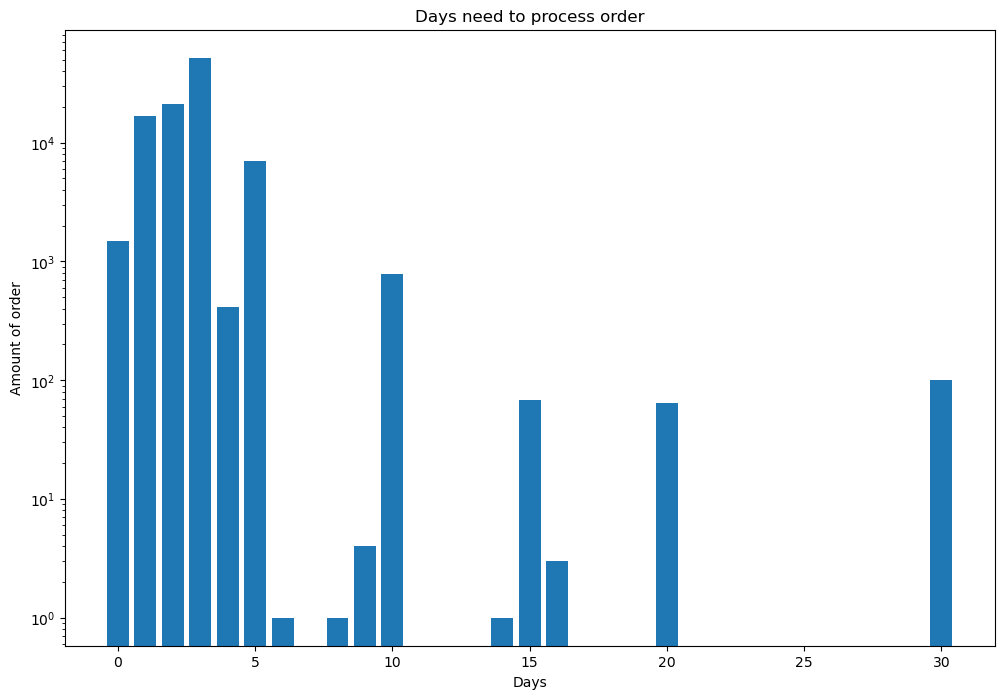

In [115]:
plt.figure(figsize=(12, 8))
plt.bar(df_ebay['declared_handling_days'].unique(), df_ebay['declared_handling_days'].value_counts())
plt.xlabel('Days')
plt.ylabel('Amount of order')
plt.yscale('log')
plt.title('Days need to process order')
plt.show()


As we can see from the chart, most of the order will be ready to ship in range of 0 to 5 days. There is quite big amount for the 10, 15, 20 and 30 days need to be ready ship which is quite un common. This could be because of lack of inventory for some item.

How many order was packed in each type of package size

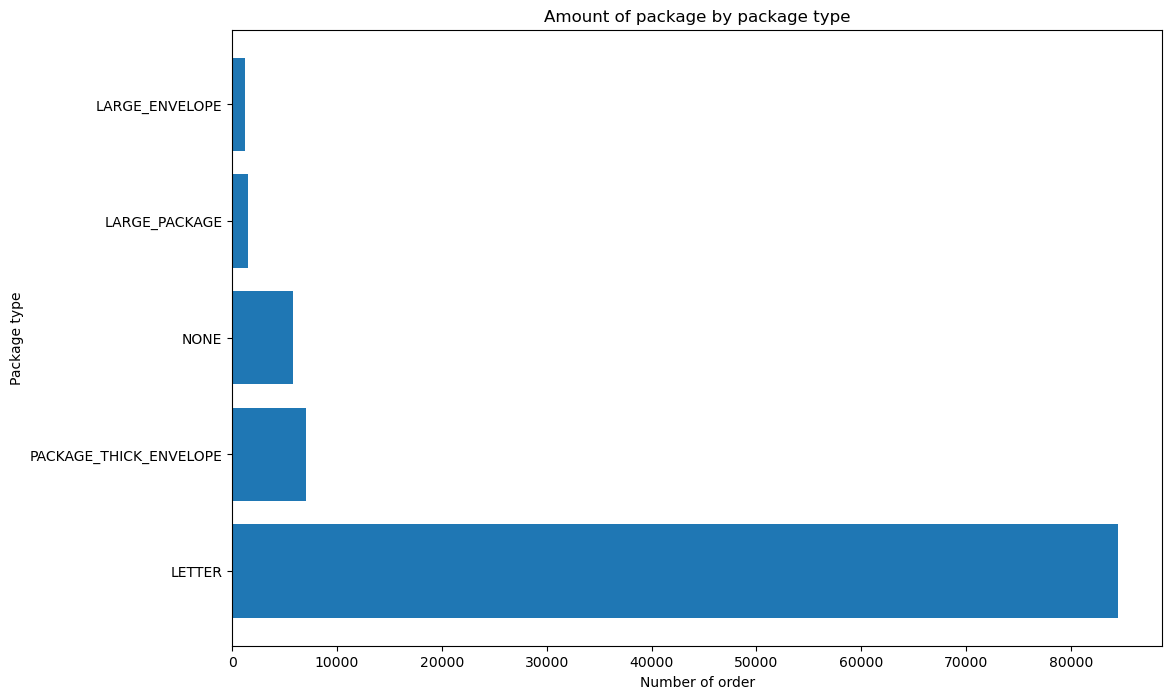

In [116]:
plt.figure(figsize=(12, 8))
plt.barh(df_ebay['package_size'].unique(), df_ebay['package_size'].value_counts())
plt.title("Amount of package by package type")
plt.xlabel('Number of order')
plt.ylabel('Package type')
plt.show()

Seem like most of the order is in small size and can be packed in `LETTER` size

Number of order by month

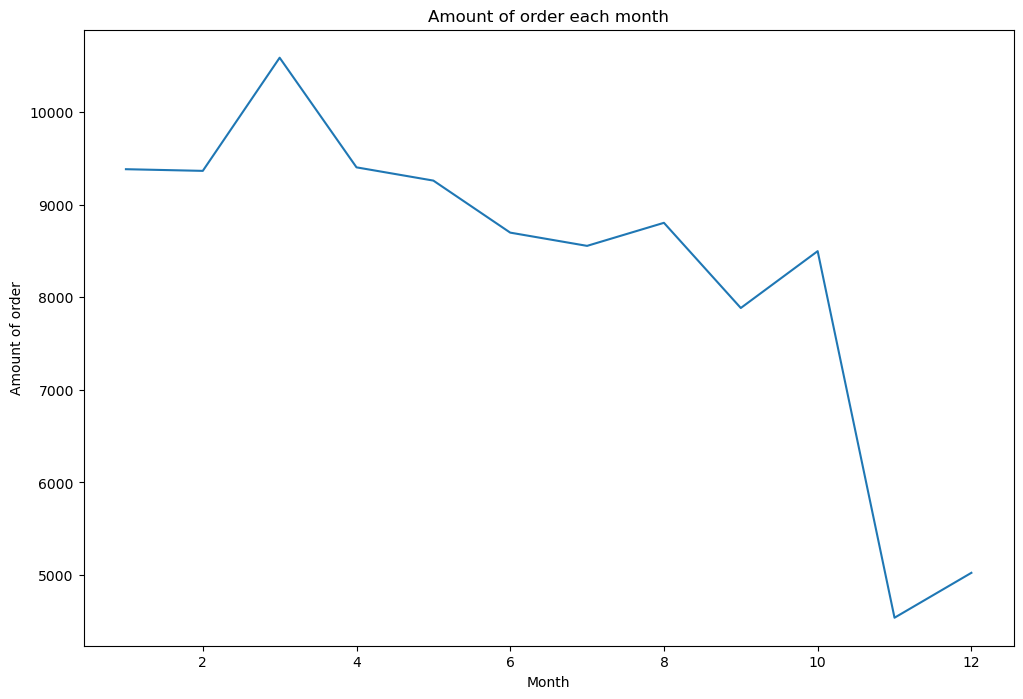

In [117]:
d= pd.to_datetime(df_ebay['payment_datetime'])
d= d.dt.month.value_counts().sort_index()
plt.figure(figsize=(12, 8))
sns.lineplot(d)
plt.title("Amount of order each month")
plt.xlabel("Month")
plt.ylabel("Amount of order")
plt.show()

Many people place orders in the early time of the year, January, and February, reaching the highest in March. There is something unfamiliar here: only a few people place orders in the range of October to December, which should be a busy time for the business.

## Feature Engineering

Let check out the distributions, we are going to check over all the column in the dataset

In [118]:
# Re call the dataset 
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   b2c_c2c                    100000 non-null  object        
 1   seller_id                  100000 non-null  int64         
 2   declared_handling_days     100000 non-null  float64       
 3   acceptance_scan_timestamp  100000 non-null  object        
 4   shipment_method_id         100000 non-null  int64         
 5   shipping_fee               100000 non-null  float64       
 6   carrier_min_estimate       100000 non-null  float64       
 7   carrier_max_estimate       100000 non-null  float64       
 8   item_zip                   100000 non-null  object        
 9   buyer_zip                  100000 non-null  object        
 10  category_id                100000 non-null  int64         
 11  item_price                 100000 non-null  float64  

#### b2c_c2c
Convert this column to binary value

In [119]:
#checking the b2c_c2c column
df_ebay['b2c_c2c'].value_counts()

B2C    69720
C2C    30280
Name: b2c_c2c, dtype: int64

Convert `b2c_c2c` column to binary

In [120]:
df_ebay['b2c_c2c']= np.where(df_ebay['b2c_c2c']=='B2C', 1, 0)

In [121]:
#Santity check
df_ebay.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,1,25454,3.0,2019-03-27,0,0.0,3.0,5.0,97219,49040,13,27.95,1,2019-03-24,2019-03-29,5,1,LETTER,1
1,0,6727381,2.0,2018-06-03,0,3.0,3.0,5.0,11415-3528,62521,0,20.50,1,2018-06-02,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,1,18507,1.0,2019-01-08,0,4.5,3.0,5.0,27292,53010,1,19.90,1,2019-01-06,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,1,4677,1.0,2018-12-18,0,0.0,3.0,5.0,90703,80022,1,35.50,1,2018-12-17,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,1,4677,1.0,2018-07-28,0,0.0,3.0,5.0,90703,55070,1,25.00,1,2018-07-27,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


#### Weigth and Weight_units

In [122]:
df_ebay['weight_units'].value_counts()

1    100000
Name: weight_units, dtype: int64

There are 2 difference `weight_units` is 1 and 2. Let say 1 - 'lbs' and 2 - 'kg'. We are going to convert all the weight units to lb.

In [123]:
#check the record has weigtht unit =2 to able to compare
df_ebay[df_ebay['weight_units']==2].head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number


In [124]:
#Convert them in to lb.
df_ebay['weight'] = np.where(df_ebay['weight_units']==1, df_ebay['weight'], df_ebay['weight']*2.20462 )

check the record with `weight_units`=2 to see if the `weight` column is changed

In [125]:
df_ebay[df_ebay['weight_units']==2]

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number


All the `weight` with the `weight_units` = 2 are convert to the **lb** unit. So now we do not need to keep the weight column since all the weight is in the **lb**. Therefore, we are going to drop the `weight_units` column.

In [126]:
df_ebay.drop(columns='weight_units', axis=1, inplace=True)

In [127]:
#check it
df_ebay.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,package_size,record_number
0,1,25454,3.0,2019-03-27,0,0.0,3.0,5.0,97219,49040,13,27.95,1,2019-03-24,2019-03-29,5.0,LETTER,1
1,0,6727381,2.0,2018-06-03,0,3.0,3.0,5.0,11415-3528,62521,0,20.50,1,2018-06-02,2018-06-05,0.0,PACKAGE_THICK_ENVELOPE,2
2,1,18507,1.0,2019-01-08,0,4.5,3.0,5.0,27292,53010,1,19.90,1,2019-01-06,2019-01-10,9.0,PACKAGE_THICK_ENVELOPE,3
3,1,4677,1.0,2018-12-18,0,0.0,3.0,5.0,90703,80022,1,35.50,1,2018-12-17,2018-12-21,8.0,PACKAGE_THICK_ENVELOPE,4
4,1,4677,1.0,2018-07-28,0,0.0,3.0,5.0,90703,55070,1,25.00,1,2018-07-27,2018-07-30,3.0,PACKAGE_THICK_ENVELOPE,5


The `weigth_units` column has been dropped. 

#### Package_size

Check the `package_size` column

In [128]:
#How many type of package 
df_ebay['package_size'].value_counts()

PACKAGE_THICK_ENVELOPE    84468
NONE                       7065
LETTER                     5787
LARGE_ENVELOPE             1495
LARGE_PACKAGE              1185
Name: package_size, dtype: int64

There are 5 type of package. so we can use the ordinal encoding to tranfer this column to numeric instead of category column. `'NONE': 0, 'LETTER': 1, 'LARGE_ENVELOPE': 2, 'LARGE_PACKAGE': 3, 'PACKAGE_THICK_ENVELOPE': 4`

In [129]:
oe_package= OrdinalEncoder(categories=[['NONE', 'LETTER', 'LARGE_ENVELOPE',
                                         'LARGE_PACKAGE', 'PACKAGE_THICK_ENVELOPE']])
df_ebay['package_size']=oe_package.fit_transform(pd.DataFrame(df_ebay['package_size'])) 

In [130]:
df_ebay['package_size'].value_counts()

4.0    84468
0.0     7065
1.0     5787
2.0     1495
3.0     1185
Name: package_size, dtype: int64

In [131]:
# Check it
df_ebay.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,package_size,record_number
0,1,25454,3.0,2019-03-27,0,0.0,3.0,5.0,97219,49040,13,27.95,1,2019-03-24,2019-03-29,5.0,1.0,1
1,0,6727381,2.0,2018-06-03,0,3.0,3.0,5.0,11415-3528,62521,0,20.50,1,2018-06-02,2018-06-05,0.0,4.0,2
2,1,18507,1.0,2019-01-08,0,4.5,3.0,5.0,27292,53010,1,19.90,1,2019-01-06,2019-01-10,9.0,4.0,3
3,1,4677,1.0,2018-12-18,0,0.0,3.0,5.0,90703,80022,1,35.50,1,2018-12-17,2018-12-21,8.0,4.0,4
4,1,4677,1.0,2018-07-28,0,0.0,3.0,5.0,90703,55070,1,25.00,1,2018-07-27,2018-07-30,3.0,4.0,5


#### Item_zip and buyer_zip

Next we are going to calculate the distance between the buyer and the seller buy using there zip code in the `item_zip` and `buyer_zip` columns.

In [132]:
#check any null value in these columns.
print(df_ebay['item_zip'].isna().any())
print(df_ebay['buyer_zip'].isna().any())

False
False


In [133]:
item_zip= df_ebay['item_zip']
buyer_zip= df_ebay['buyer_zip']

In [134]:
import mpu
from uszipcode import SearchEngine
# from pathlib_mate.pathlib2 import Path
# import uszipcode.search as search

def get_distance(item_zip, buyer_zip):
    """
    We are going to use the package mpu and uszipcode to imporve the speed of calculating the distance between buyer and seller by using zip code. 
    These 2 packages make the speed of calculation much faster compare with using the geopy package

    we are going to take 5 first number of the zipcode since there are some are in format 5+4 or 9(same format but missing the dash)
    """
    if item_zip is not None and buyer_zip is not None:
        search_location = SearchEngine()
        item_location = search_location.by_zipcode(item_zip[0:5])
        buyer_location =search_location.by_zipcode(buyer_zip[0:5])
        if item_location is None or buyer_location is None:
            return None
        else:
            lat1 =item_location.lat
            long1 =item_location.lng
            lat2 =buyer_location.lat
            long2 =buyer_location.lng
            distance = mpu.haversine_distance((lat1,long1),(lat2,long2)) 
            if lat1 is None or lat2 is None or long1 is None or long2 is None:
                return None
            return [distance, lat1, long1, lat2, long2]
    else:
        return None



def add_zip_distance_column(item_zip, buyer_zip):
    item_zip_str = item_zip.apply(lambda x: str(x))
    buyer_zip_str = buyer_zip.apply(lambda x: str(x))

    zips = pd.concat([item_zip_str, buyer_zip_str], axis=1)

    zips['distance'] = zips.apply(lambda x: get_distance(x.item_zip, x.buyer_zip), axis=1)
    
    return zips['distance']

In [135]:
distance = add_zip_distance_column(item_zip, buyer_zip)

In [136]:
distance[1]

[1282.9080171786184, 40.71, -73.83, 39.85, -88.93]

In [137]:
dis=[]
buyer_lat=[]
buyer_lon=[]
seller_lat=[]
seller_lon=[]
for i in range(len(distance)):
    if distance[i] is None:
        dis.append(None)
        buyer_lon.append(None)
        buyer_lat.append(None)
        seller_lon.append(None)
        seller_lat.append(None)
    else:
        dis.append(distance[i][0])
        buyer_lat.append(distance[i][3])
        buyer_lon.append(distance[i][4])
        seller_lat.append(distance[i][1])
        seller_lon.append(distance[i][2])

Add the value of the distance in to the data frame

In [138]:
#add distance to dataframe
df_ebay['distance']= dis
df_ebay['buyyer_lat']=buyer_lat
df_ebay['buyyer_lon']=buyer_lon
df_ebay['seller_lon']=seller_lon
df_ebay['seller_lat']=seller_lat

In [139]:
df_ebay.head(6)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,...,payment_datetime,delivery_date,weight,package_size,record_number,distance,buyyer_lat,buyyer_lon,seller_lon,seller_lat
0,1,25454,3.0,2019-03-27,0,0.0,3.0,5.0,97219,49040,...,2019-03-24,2019-03-29,5.0,1.0,1,3001.839179,41.95,-85.32,-122.69,45.45
1,0,6727381,2.0,2018-06-03,0,3.0,3.0,5.0,11415-3528,62521,...,2018-06-02,2018-06-05,0.0,4.0,2,1282.908017,39.85,-88.93,-73.83,40.71
2,1,18507,1.0,2019-01-08,0,4.5,3.0,5.0,27292,53010,...,2019-01-06,2019-01-10,9.0,4.0,3,1104.444168,43.59,-88.28,-80.25,35.80
3,1,4677,1.0,2018-12-18,0,0.0,3.0,5.0,90703,80022,...,2018-12-17,2018-12-21,8.0,4.0,4,1353.390003,39.88,-104.80,-118.05,33.86
4,1,4677,1.0,2018-07-28,0,0.0,3.0,5.0,90703,55070,...,2018-07-27,2018-07-30,3.0,4.0,5,2456.330752,45.39,-93.38,-118.05,33.86
5,1,10514,1.0,2019-04-20,0,0.0,3.0,5.0,43215,77063,...,2019-04-19,2019-04-22,1.0,4.0,6,1608.340906,29.74,-95.52,-83.01,39.97


Take a look at th data  after change

In [140]:
df_ebay.head(10)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,...,payment_datetime,delivery_date,weight,package_size,record_number,distance,buyyer_lat,buyyer_lon,seller_lon,seller_lat
0,1,25454,3.0,2019-03-27,0,0.00,3.0,5.0,97219,49040,...,2019-03-24,2019-03-29,5.0,1.0,1,3001.839179,41.95,-85.32,-122.69,45.45
1,0,6727381,2.0,2018-06-03,0,3.00,3.0,5.0,11415-3528,62521,...,2018-06-02,2018-06-05,0.0,4.0,2,1282.908017,39.85,-88.93,-73.83,40.71
2,1,18507,1.0,2019-01-08,0,4.50,3.0,5.0,27292,53010,...,2019-01-06,2019-01-10,9.0,4.0,3,1104.444168,43.59,-88.28,-80.25,35.80
3,1,4677,1.0,2018-12-18,0,0.00,3.0,5.0,90703,80022,...,2018-12-17,2018-12-21,8.0,4.0,4,1353.390003,39.88,-104.80,-118.05,33.86
4,1,4677,1.0,2018-07-28,0,0.00,3.0,5.0,90703,55070,...,2018-07-27,2018-07-30,3.0,4.0,5,2456.330752,45.39,-93.38,-118.05,33.86
5,1,10514,1.0,2019-04-20,0,0.00,3.0,5.0,43215,77063,...,2019-04-19,2019-04-22,1.0,4.0,6,1608.340906,29.74,-95.52,-83.01,39.97
6,1,104,1.0,2019-02-09,0,0.00,3.0,5.0,91304,60565,...,2019-02-09,2019-02-11,0.0,4.0,7,2781.527939,41.73,-88.12,-118.59,34.22
7,1,340356,1.0,2018-04-24,0,2.95,3.0,5.0,49735,29379,...,2018-04-23,2018-04-25,1.0,4.0,8,1174.270246,34.72,-81.62,-84.67,45.02
8,1,113915,5.0,2019-10-12,3,0.00,2.0,8.0,43606,32958,...,2019-10-11,2019-10-15,0.0,0.0,9,1568.867800,27.78,-80.48,-83.58,41.66
9,1,130301,1.0,2019-08-10,1,0.00,2.0,5.0,35117,84776,...,2019-08-09,2019-08-12,112.0,4.0,10,2311.015450,37.64,-112.08,-86.89,33.67


#### Creater new column using `acceptance_scan_timestamp`, `payment_datetime` and `delivery_date`

Now we see that most of the column is in the good shape. But the model cannot run with the datetime type of variable. So we are going to create some 2 new column base on the datetime column. 
-   **handling_date** = `acceptance_scan_timestamp` - `payment_dateime`
-   **shipping_date** = `delivery_date` - `acceptance_scan_timestamp`
-   **total_time** = `delivery_date` - `payment_dateime`

First, we convert all 3 columns to datetime value

In [141]:
df_ebay['acceptance_scan_timestamp']= pd.to_datetime(df_ebay['acceptance_scan_timestamp'])
df_ebay['payment_datetime']= pd.to_datetime(df_ebay['payment_datetime'])
df_ebay['delivery_date']= pd.to_datetime(df_ebay['delivery_date'])

In [142]:
#calulate date function
def date_calculate(day1, day2):
    number_of_day=[]
    date_list= day2- day1
    for day in date_list:
        date= day.days
        number_of_day.append(date)
    return number_of_day


In [143]:
#calulate handling_date
handling_date= date_calculate(df_ebay['payment_datetime'], df_ebay['acceptance_scan_timestamp'])

#calculate shipping_date
shipping_date= date_calculate(df_ebay['acceptance_scan_timestamp'], df_ebay['delivery_date'])

#calculate totlatime

total_time= date_calculate(df_ebay['payment_datetime'], df_ebay['delivery_date'])


Create `handling_date` and `shipping_date` as new columns in data frame and add the value for it

In [144]:
df_ebay['handling_date']= handling_date
df_ebay['shipping_date']= shipping_date
df_ebay['total_time']= total_time

In [145]:
#check data frame
df_ebay.sample(10)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,...,package_size,record_number,distance,buyyer_lat,buyyer_lon,seller_lon,seller_lat,handling_date,shipping_date,total_time
77693,1,264,0.0,2018-11-09,1,0.00,2.0,5.0,45069,48162,...,4.0,77694,303.671714,41.96,-83.43,-84.40,39.33,1,1,2
24568,0,892856,0.0,2019-10-02,0,0.00,3.0,5.0,35749,42303,...,4.0,24569,324.766779,37.76,-87.05,-86.74,34.85,2,1,3
83775,1,466909,1.0,2018-07-30,5,14.99,2.0,5.0,37760,77377,...,4.0,83776,1319.200459,30.06,-95.68,-83.48,36.11,0,2,2
90862,1,36987,1.0,2019-09-24,2,19.78,2.0,9.0,91335,11214,...,4.0,90863,3955.395118,40.60,-74.00,-118.54,34.20,1,3,4
47973,0,925745,1.0,2018-01-14,0,2.75,3.0,5.0,47188,79772,...,4.0,47974,NaN,NaN,NaN,NaN,NaN,2,3,5
80829,0,123969,2.0,2019-03-22,3,0.00,2.0,8.0,46052,89027,...,4.0,80830,2428.005195,36.78,-114.14,-86.47,40.05,2,3,5
22204,1,8682,1.0,2019-08-06,0,0.00,3.0,5.0,55447,74960,...,0.0,22205,1026.399241,35.81,-94.63,-93.49,45.00,2,2,4
81449,0,522596,5.0,2019-04-10,1,16.15,2.0,5.0,50510,55123,...,4.0,81450,267.984177,44.81,-93.14,-94.94,42.78,4,1,5
65197,1,110521,1.0,2018-08-29,2,5.50,2.0,9.0,07866,23430,...,4.0,65198,477.939808,36.98,-76.61,-74.49,40.95,0,2,2
64533,1,378074,2.0,2018-07-21,1,14.25,2.0,5.0,98296,53965,...,4.0,64534,2532.799127,43.62,-89.77,-122.09,47.85,1,2,3


#### Seprate the payment_datetime to year, mon, date column

In [146]:
df_ebay['pay_year']= df_ebay['payment_datetime'].dt.year
df_ebay['pay_month']= df_ebay['payment_datetime'].dt.month
df_ebay['pay_date']= df_ebay['payment_datetime'].dt.day


In [147]:
#Check table
df_ebay.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,...,buyyer_lat,buyyer_lon,seller_lon,seller_lat,handling_date,shipping_date,total_time,pay_year,pay_month,pay_date
0,1,25454,3.0,2019-03-27,0,0.0,3.0,5.0,97219,49040,...,41.95,-85.32,-122.69,45.45,3,2,5,2019,3,24
1,0,6727381,2.0,2018-06-03,0,3.0,3.0,5.0,11415-3528,62521,...,39.85,-88.93,-73.83,40.71,1,2,3,2018,6,2
2,1,18507,1.0,2019-01-08,0,4.5,3.0,5.0,27292,53010,...,43.59,-88.28,-80.25,35.80,2,2,4,2019,1,6
3,1,4677,1.0,2018-12-18,0,0.0,3.0,5.0,90703,80022,...,39.88,-104.80,-118.05,33.86,1,3,4,2018,12,17
4,1,4677,1.0,2018-07-28,0,0.0,3.0,5.0,90703,55070,...,45.39,-93.38,-118.05,33.86,1,2,3,2018,7,27


In [148]:
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   b2c_c2c                    100000 non-null  int64         
 1   seller_id                  100000 non-null  int64         
 2   declared_handling_days     100000 non-null  float64       
 3   acceptance_scan_timestamp  100000 non-null  datetime64[ns]
 4   shipment_method_id         100000 non-null  int64         
 5   shipping_fee               100000 non-null  float64       
 6   carrier_min_estimate       100000 non-null  float64       
 7   carrier_max_estimate       100000 non-null  float64       
 8   item_zip                   100000 non-null  object        
 9   buyer_zip                  100000 non-null  object        
 10  category_id                100000 non-null  int64         
 11  item_price                 100000 non-null  float64  

In [149]:
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   b2c_c2c                    100000 non-null  int64         
 1   seller_id                  100000 non-null  int64         
 2   declared_handling_days     100000 non-null  float64       
 3   acceptance_scan_timestamp  100000 non-null  datetime64[ns]
 4   shipment_method_id         100000 non-null  int64         
 5   shipping_fee               100000 non-null  float64       
 6   carrier_min_estimate       100000 non-null  float64       
 7   carrier_max_estimate       100000 non-null  float64       
 8   item_zip                   100000 non-null  object        
 9   buyer_zip                  100000 non-null  object        
 10  category_id                100000 non-null  int64         
 11  item_price                 100000 non-null  float64  

We are going to convert all the float column in to interger.


#### Recheck the table and save data in new csv file


In [150]:
df_ebay.shape


(100000, 29)

In [151]:
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   b2c_c2c                    100000 non-null  int64         
 1   seller_id                  100000 non-null  int64         
 2   declared_handling_days     100000 non-null  float64       
 3   acceptance_scan_timestamp  100000 non-null  datetime64[ns]
 4   shipment_method_id         100000 non-null  int64         
 5   shipping_fee               100000 non-null  float64       
 6   carrier_min_estimate       100000 non-null  float64       
 7   carrier_max_estimate       100000 non-null  float64       
 8   item_zip                   100000 non-null  object        
 9   buyer_zip                  100000 non-null  object        
 10  category_id                100000 non-null  int64         
 11  item_price                 100000 non-null  float64  

In [152]:
#convert all float column to interger
df_ebay[['declared_handling_days', 'shipping_fee','carrier_min_estimate', 'carrier_max_estimate', 'item_price', 'weight', 'package_size', 'distance']] =\
      round(df_ebay[['declared_handling_days', 'shipping_fee','carrier_min_estimate', 'carrier_max_estimate', 'item_price', 'weight', 'package_size', 'distance']])

In [153]:
#check null again
df_ebay.isna().sum()

b2c_c2c                         0
seller_id                       0
declared_handling_days          0
acceptance_scan_timestamp       0
shipment_method_id              0
shipping_fee                    0
carrier_min_estimate            0
carrier_max_estimate            0
item_zip                        0
buyer_zip                       0
category_id                     0
item_price                      0
quantity                        0
payment_datetime                0
delivery_date                   0
weight                          0
package_size                    0
record_number                   0
distance                     1301
buyyer_lat                   1301
buyyer_lon                   1301
seller_lon                   1301
seller_lat                   1301
handling_date                   0
shipping_date                   0
total_time                      0
pay_year                        0
pay_month                       0
pay_date                        0
dtype: int64

We can see there are some value in the `distance` column is count as NA here. It could be because the Zipcode of the buyer or seller is not in the right format. We are going to drop all of row with NA in distance here since it is only 1257 rows over 95042 rows in total(around 1.3% the amount of data).

In [154]:
df_ebay= df_ebay.dropna()
#check Dropped
df_ebay.isna().any().any()

False

In [155]:
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98699 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   b2c_c2c                    98699 non-null  int64         
 1   seller_id                  98699 non-null  int64         
 2   declared_handling_days     98699 non-null  float64       
 3   acceptance_scan_timestamp  98699 non-null  datetime64[ns]
 4   shipment_method_id         98699 non-null  int64         
 5   shipping_fee               98699 non-null  float64       
 6   carrier_min_estimate       98699 non-null  float64       
 7   carrier_max_estimate       98699 non-null  float64       
 8   item_zip                   98699 non-null  object        
 9   buyer_zip                  98699 non-null  object        
 10  category_id                98699 non-null  int64         
 11  item_price                 98699 non-null  float64       
 12  quan

Now we export the data to the new CSV then later on we only work with clean data

In [156]:
df_ebay.to_csv('../data/cleaned/Ebay_cleaned.csv')

## Summary and Next-step

In this notebook we did:
-   Filled missing value of the data
-   Fixed some error value( handling day <0)
-   Added new columns aslo delete the column which has relevent meaning with other

***Next Step***
-   Create some regression models
-   Evaluate and tune hyperparameters for them.
-   Find which model will predict the less amount of  late dates and the difference with the actual value is not significantly